In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Taking data from a URL

In [2]:
url = 'http://bit.ly/drinksbycountry'

In [3]:
pd.read_table(url)

,"country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent"
0,"Afghanistan,0,0,0,0.0,Asia"
1,"Albania,89,132,54,4.9,Europe"
2,"Algeria,25,0,14,0.7,Africa"
3,"Andorra,245,138,312,12.4,Europe"
4,"Angola,217,57,45,5.9,Africa"
...,...
188,"Venezuela,333,100,3,7.7,South America"
189,"Vietnam,111,2,1,2.0,Asia"
190,"Yemen,6,0,0,0.1,Asia"
191,"Zambia,32,19,4,2.5,Africa"


In [4]:
pd.read_table(url,sep=',')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


### loading data from other folder

In [5]:
data = pd.read_csv(r'C:\Users\user\Downloads\beer-servings.csv')

In [6]:
data.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [7]:
# data.drop('Unnamed:0',implace=True,axis=1)

In [8]:
data = pd.read_csv(r'C:\Users\user\Downloads\beer-servings.csv',index_col='Unnamed: 0')

In [9]:
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 185 non-null    float64
 2   spirit_servings               185 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  192 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 10.6+ KB


In [11]:
data.shape

(193, 6)

In [12]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

### Filling missing values

In [13]:
data.dtypes

country                          object
beer_servings                   float64
spirit_servings                 float64
wine_servings                   float64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

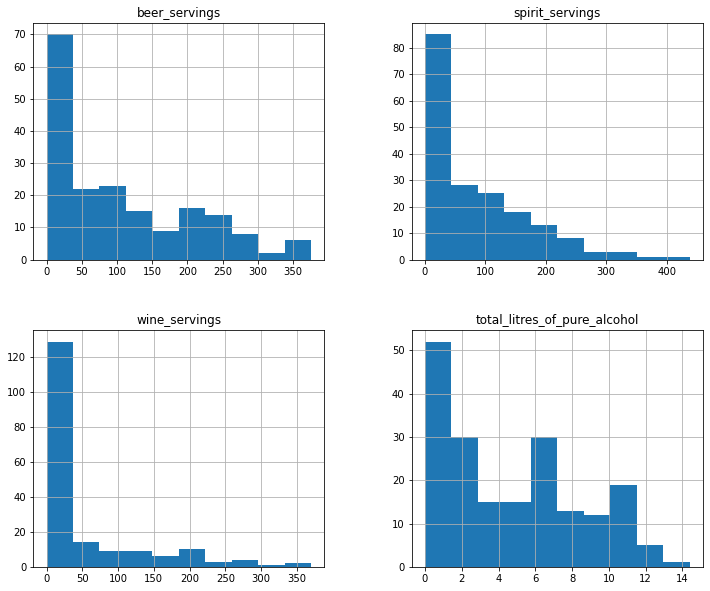

In [14]:
freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(12,10))
plt.show()

In [15]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [16]:
data['beer_servings'] = data['beer_servings'].fillna(data['beer_servings'].median()) # since every graph is positively skewed

In [17]:
data.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [18]:
for i in ['spirit_servings', 'wine_servings','total_litres_of_pure_alcohol']:
    data[i] = data[i].fillna(data[i].median())

In [19]:
data.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [20]:
data.groupby('continent')['beer_servings'].mean()

continent
Africa            61.471698
Asia              40.613636
Europe           190.822222
North America    145.434783
Oceania           89.687500
South America    137.000000
Name: beer_servings, dtype: float64

In [21]:
data.country.nunique()

193

In [22]:
data = data.drop('country',axis=1)

In [23]:
data.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0.0,0.0,0.0,0.0,Asia
1,89.0,132.0,54.0,4.9,Europe
2,25.0,0.0,14.0,0.7,Africa
3,245.0,138.0,312.0,12.4,Europe
4,217.0,57.0,45.0,5.9,Africa


### Checking for outliers

<AxesSubplot:ylabel='beer_servings'>

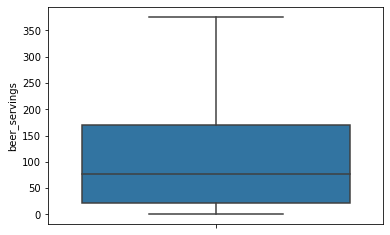

In [24]:
sns.boxplot(y='beer_servings',data=data)

<AxesSubplot:ylabel='spirit_servings'>

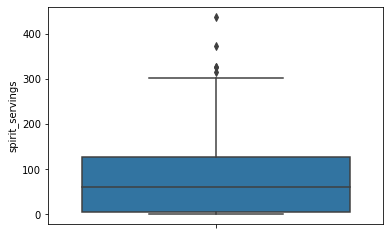

In [25]:
sns.boxplot(y='spirit_servings',data=data)

In [26]:
Q1 = np.percentile(data['spirit_servings'],25,interpolation='midpoint')
Q2 = np.percentile(data['spirit_servings'],50,interpolation='midpoint')
Q3 = np.percentile(data['spirit_servings'],75,interpolation='midpoint')

In [27]:
print(Q1)
print(Q2)  # median
print(Q3)

5.0
60.0
128.0


In [28]:
IQR = Q3 - Q1

In [29]:
low_limit = Q1 - IQR*1.5
up_limit = Q3 + IQR*1.5

In [30]:
print(low_limit,up_limit)

-179.5 312.5


In [31]:
outlier = []
for x in data['spirit_servings']:
    if((x > up_limit) or (x < low_limit)):
        outlier.append(x)

In [32]:
outlier

[373.0, 438.0, 326.0, 326.0, 315.0]

In [33]:
ind1 = data['spirit_servings']>up_limit
data.loc[ind1].index

Int64Index([15, 68, 73, 141, 144], dtype='int64')

In [34]:
data.drop([15, 68, 73, 141, 144],inplace=True)

<AxesSubplot:ylabel='spirit_servings'>

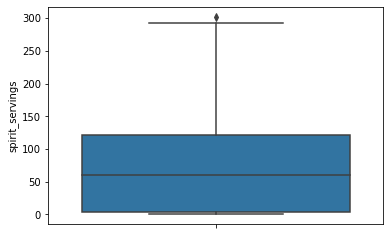

In [35]:
sns.boxplot(y='spirit_servings',data=data)

<AxesSubplot:ylabel='wine_servings'>

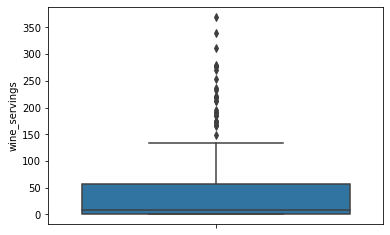

In [36]:
sns.boxplot(y='wine_servings',data=data)

In [37]:
Q1 = np.percentile(data['wine_servings'],25,interpolation='midpoint')
Q2 = np.percentile(data['wine_servings'],50,interpolation='midpoint')
Q3 = np.percentile(data['wine_servings'],75,interpolation='midpoint')
IQR = Q3 - Q1
low_limit = Q1 - IQR*1.5
up_limit = Q3 + IQR*1.5
outlier = []
for x in data['wine_servings']:
    if((x > up_limit) or (x < low_limit)):
        outlier.append(x)
ind1 = data['wine_servings']>up_limit
data.loc[ind1].index

Int64Index([  3,   6,   8,   9,  16,  35,  42,  48,  55,  61,  64,  65,  67,
             75,  81,  83,  99, 120, 121, 136, 140, 156, 165, 166, 182, 185],
           dtype='int64')

In [38]:
data.drop([3,   6,   8,   9,  16,  35,  42,  48,  55,  61,  64,  65,  67, 75,  81,  83,  99, 120, 121, 136, 140, 156, 165, 166, 182, 185],inplace=True)

<AxesSubplot:ylabel='wine_servings'>

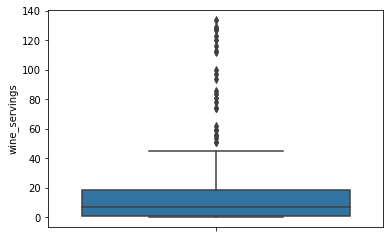

In [39]:
sns.boxplot(y='wine_servings',data=data)

<AxesSubplot:ylabel='total_litres_of_pure_alcohol'>

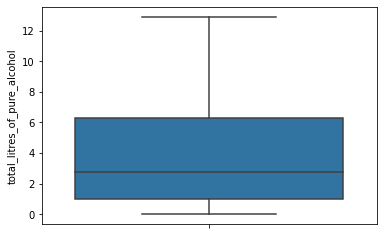

In [40]:
sns.boxplot(y='total_litres_of_pure_alcohol',data=data)

In [41]:
data.shape

(162, 5)

### one hot encoding

In [42]:
data.continent.nunique()

6

In [43]:
data = pd.get_dummies(data)
data.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,0.0,0.0,0.0,0.0,0,1,0,0,0,0
1,89.0,132.0,54.0,4.9,0,0,1,0,0,0
2,25.0,0.0,14.0,0.7,1,0,0,0,0,0
4,217.0,57.0,45.0,5.9,1,0,0,0,0,0
5,102.0,128.0,45.0,4.9,0,0,0,1,0,0


<AxesSubplot:>

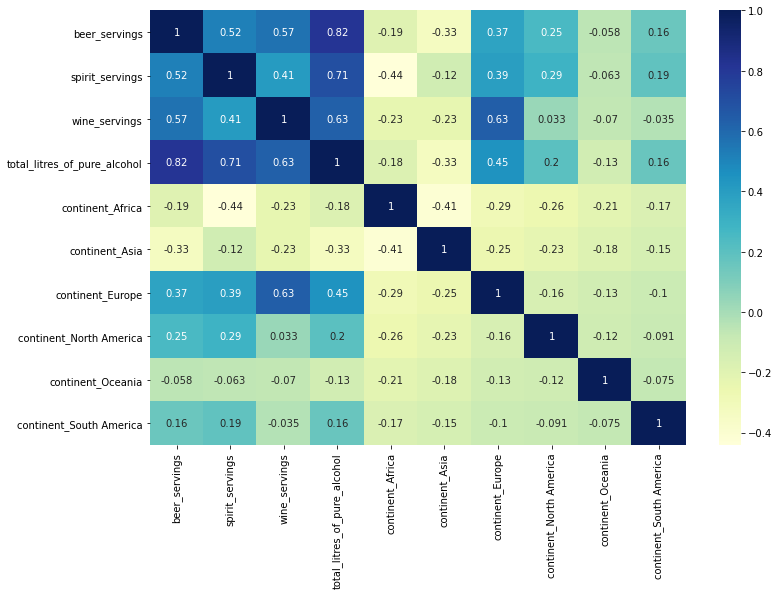

In [44]:
corr = data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True, cmap ='YlGnBu')

In [45]:
data.columns

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent_Africa', 'continent_Asia',
       'continent_Europe', 'continent_North America', 'continent_Oceania',
       'continent_South America'],
      dtype='object')

In [46]:
y = data['total_litres_of_pure_alcohol']
x = data.drop('total_litres_of_pure_alcohol',axis = 1)

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [48]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
predictions = model.predict(x_test)

In [49]:
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,predictions))

MSE is: 1.4107151984592188


In [50]:
from sklearn.metrics import r2_score
print('R sqaured value is:',r2_score(y_test,predictions))

R sqaured value is: 0.8413520664385032


# Standard Sclaing

In [51]:
x.describe()

,beer_servings,spirit_servings,wine_servings,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,86.592593,72.240741,20.598765,0.320988,0.265432,0.148148,0.123457,0.086420,0.055556
std,91.963911,79.305981,33.331473,0.468304,0.442932,0.356348,0.329981,0.281854,0.229772
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.250000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.500000,43.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,127.000000,120.750000,18.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,376.000000,302.000000,134.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
type(x)

pandas.core.frame.DataFrame

In [55]:
from sklearn import preprocessing

In [56]:
standardisation = preprocessing.StandardScaler()
x = standardisation.fit_transform(x)

In [57]:
x = pd.DataFrame(x)

In [58]:
x.describe()

,0,1,2,3,4,5,6,7,8
count,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02
mean,-4.403199e-17,-1.117076e-16,9.594520e-18,6.579099e-17,-1.672188e-16,5.962309e-17,1.706454e-16,3.289550e-16,-6.304970e-17
std,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00
min,-9.445129e-01,-9.137362e-01,-6.199137e-01,-6.875517e-01,-6.011194e-01,-4.170288e-01,-3.752933e-01,-3.075623e-01,-2.425356e-01
25%,-7.563577e-01,-8.757907e-01,-5.898190e-01,-6.875517e-01,-6.011194e-01,-4.170288e-01,-3.752933e-01,-3.075623e-01,-2.425356e-01
50%,-3.500515e-01,-3.698512e-01,-4.092508e-01,-6.875517e-01,-6.011194e-01,-4.170288e-01,-3.752933e-01,-3.075623e-01,-2.425356e-01
75%,4.407457e-01,6.135688e-01,-5.563805e-02,1.454436e+00,1.663563e+00,-4.170288e-01,-3.752933e-01,-3.075623e-01,-2.425356e-01
max,3.156725e+00,2.906107e+00,3.412777e+00,1.454436e+00,1.663563e+00,2.397916e+00,2.664583e+00,3.251373e+00,4.123106e+00


In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
predictions = model.predict(x_test)
print('MSE is:',mean_squared_error(y_test,predictions))
print('R sqaured value is:',r2_score(y_test,predictions))

MSE is: 1.4107151984592219
R sqaured value is: 0.8413520664385029


# Min Max scaler

In [60]:
x = data.drop('total_litres_of_pure_alcohol',axis = 1)

In [61]:
x.describe()

,beer_servings,spirit_servings,wine_servings,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,86.592593,72.240741,20.598765,0.320988,0.265432,0.148148,0.123457,0.086420,0.055556
std,91.963911,79.305981,33.331473,0.468304,0.442932,0.356348,0.329981,0.281854,0.229772
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.250000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.500000,43.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,127.000000,120.750000,18.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,376.000000,302.000000,134.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
x = min_max.fit_transform(x)

In [63]:
x = pd.DataFrame(x)

In [64]:
x.describe()

,0,1,2,3,4,5,6,7,8
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,0.230299,0.239208,0.153722,0.320988,0.265432,0.148148,0.123457,0.086420,0.055556
std,0.244585,0.262603,0.248742,0.468304,0.442932,0.356348,0.329981,0.281854,0.229772
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.045878,0.009934,0.007463,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.144947,0.142384,0.052239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.337766,0.399834,0.139925,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
predictions = model.predict(x_test)
print('MSE is:',mean_squared_error(y_test,predictions))
print('R sqaured value is:',r2_score(y_test,predictions))

MSE is: 1.410715198459222
R sqaured value is: 0.8413520664385029


# Normalization

In [66]:
x = data.drop('total_litres_of_pure_alcohol',axis = 1)

In [67]:
x = preprocessing.normalize(x)

In [68]:
x = pd.DataFrame(x)

In [69]:
x.describe()

,0,1,2,3,4,5,6,7,8
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,0.648990,0.475226,0.143663,0.031865,0.046742,0.012995,0.000695,0.007435,0.000298
std,0.325793,0.343203,0.181514,0.138976,0.190563,0.110713,0.002087,0.078627,0.001315
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.404680,0.148553,0.017131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.756581,0.497608,0.068452,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.940029,0.795130,0.208306,0.010918,0.004366,0.000000,0.000000,0.000000,0.000000
max,0.999961,0.996860,0.917663,1.000000,1.000000,1.000000,0.011570,1.000000,0.009300


In [70]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
predictions = model.predict(x_test)
print('MSE is:',mean_squared_error(y_test,predictions))
print('R sqaured value is:',r2_score(y_test,predictions))

MSE is: 9.95575844785331
R sqaured value is: -0.11961684861297739


 **Not a good procedure. Normalization good for categorical data only**

# Feature Reduction

<AxesSubplot:>

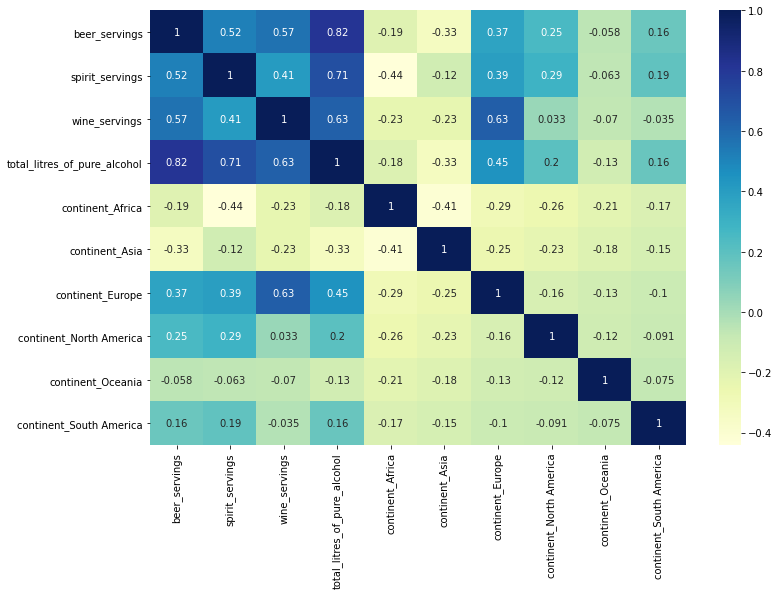

In [71]:
corr = data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True, cmap ='YlGnBu')

In [75]:
data.columns

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent_Africa', 'continent_Asia',
       'continent_Europe', 'continent_North America', 'continent_Oceania',
       'continent_South America'],
      dtype='object')

In [76]:
data.drop(['spirit_servings', 'wine_servings'], axis=1, inplace=True)

In [77]:
y = data['total_litres_of_pure_alcohol']
x = data.drop('total_litres_of_pure_alcohol',axis = 1)
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
predictions = model.predict(x_test)
print('MSE is:',mean_squared_error(y_test,predictions))
print('R sqaured value is:',r2_score(y_test,predictions))

MSE is: 2.7842978082453302
R sqaured value is: 0.6868800349068505


Feature scaling is not adviced in smaller data